## Implementing Linear Least Squares from "scratch"

This shows how to do linear regression using least squares from basic python (I use numpy for linear algebra)

In [32]:
import numpy as np
from numpy import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.linear_model as lm

#### Random Correlated Data

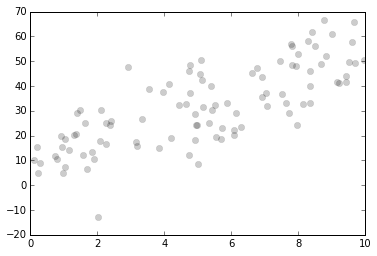

In [312]:
# generate some correlated data which we want to find the best fit lineat estimator
scale_factor = 10
data_set_size = 100
x = random.random(data_set_size)*scale_factor
true_coef = 4
true_intercept = 10
y = true_coef*x + true_intercept + scale_factor*random.randn(data_set_size)
x = x[:, np.newaxis] # to prepare for sklearn
#plt.plot(x,y,'-r')
plt.plot(x[:,0],y, 'ok', alpha = 0.2)


#### Using sklearn

Coefficients (and intercept): 
 [ 4.29258841] 9.77499841363
Residual sum of squares: 106.77
Variance score: 0.59


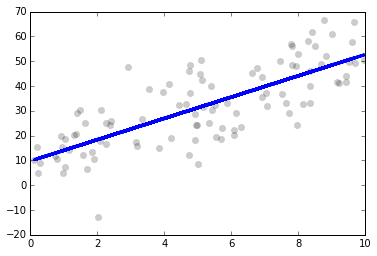

In [313]:
regr = lm.LinearRegression()
regr.fit(x, y)

# The coefficients
print('Coefficients (and intercept): \n', regr.coef_, regr.intercept_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(x) - y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

# Plot outputs
plt.plot(x[:,0],y, 'ok', alpha = 0.2)
plt.plot(x, regr.predict(x),'-',
         linewidth=3)




#### Using linear algebra

Coefficients (and intercept): 
 [[ 4.29258841]] [[ 9.77499841]]


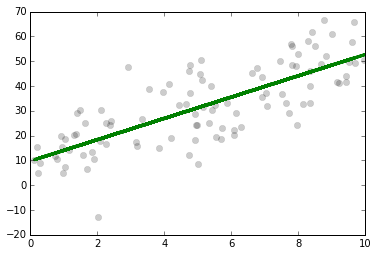

In [314]:
# en.wikipedia.org/wiki/Linear_least_squares_(mathematics)#The_general_problem

XX = np.matrix(np.hstack((x, np.ones(x.shape)))) # adding in ones vector for intercept
YY = np.matrix(y).T # we need this as a column vector for the lin alg to worky
Beta = ((XX.T * XX).I * XX.T )* YY

# The coefficients
print('Coefficients (and intercept): \n', Beta[0:-1], Beta[-1])

# #TODO
# # The mean square error
# print("Residual sum of squares: %.2f"
#       % np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2))
# # Explained variance score: 1 is perfect prediction
# print('Variance score: %.2f' % regr.score(diabetes_X_test, diabetes_y_test))
y_predict = XX * Beta
# Plot outputs
plt.plot(x[:,0],y, 'ok', alpha = 0.2)
plt.plot(x, y_predict,'g-',
         linewidth=3)